In [2]:
from google.colab import files
uploaded = files.upload()

Saving natasha.png to natasha.png


In [0]:
#import required library
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpig
%matplotlib inline


TypeError: ignored

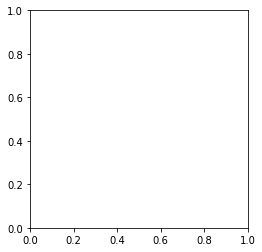

In [5]:
image = cv2.imread('circlegrey.png')
#image = cv2.imread('building.png')
#image = cv2.imread('dog2.png')
plt.imshow(image),plt.title('Original')

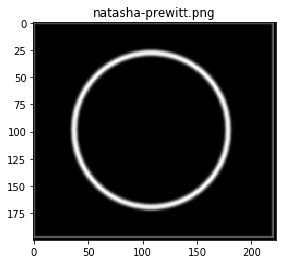

In [0]:

#chose and read the gray scale image 
gray_img = cv2.imread('circlegrey.png',cv2.IMREAD_GRAYSCALE)
#gray_img = cv2.imread('building.png',cv2.IMREAD_GRAYSCALE)
#gray_img = cv2.imread('dog2.png',cv2.IMREAD_GRAYSCALE)

#applying gaussian filter
gray_img = cv2.GaussianBlur(gray_img, (5,5),0)

# Prewitt Operator
h, w = gray_img.shape


#Creating Prewitt operator for finding gradient
horizontal = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
vertical = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

# define images with 0s
grad = np.zeros((h, w))

# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j]) + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1]) + \
                         (horizontal[1, 1] * gray_img[i, j]) + \
                         (horizontal[1, 2] * gray_img[i, j + 1]) + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j]) + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                       (vertical[0, 1] * gray_img[i - 1, j]) + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                       (vertical[1, 0] * gray_img[i, j - 1]) + \
                       (vertical[1, 1] * gray_img[i, j]) + \
                       (vertical[1, 2] * gray_img[i, j + 1]) + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                       (vertical[2, 1] * gray_img[i + 1, j]) + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        grad[i - 1, j - 1] = mag


plt.figure()
plt.title('natasha-prewitt.png')
plt.imsave('natasha1.png', grad, cmap='gray', format='png')
plt.imshow(grad, cmap='gray')
plt.show()

Non-Maxima Suppression Image


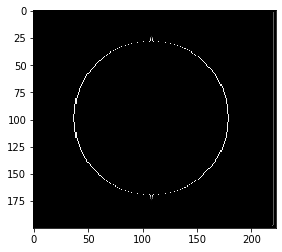

In [0]:
#Creating a new image to store updated values after nonmaxima supression
newgrad = np.zeros((r,c))
r,c = grad.shape
new = np.zeros((r,c))

#Find gradient by convolving kernal with low pass filtered image
s1 = cv2.filter2D(gray_img, cv2.CV_32F, horizontal)
s2 = cv2.filter2D(gray_img, cv2.CV_32F, vertical)

#Calulating gradient and phase information from the gradient information
phase = cv2.phase(s1, s2, 1)
#phase =(180/np.pi)*phase      #Converting the value of angle from Radian to Degree

#Quantising the Phase values and storing the index of target pixels in xi and yi.
x1,y1 = np.where(((phase>0) & (phase<=22.5)) | ((phase>157.5) & (phase<=202.5)) | ((phase>337.5)&(phase<360)))
x2,y2 = np.where(((phase>22.5) & (phase<=67.5)) | ((phase>202.5) & (phase<=247.5)))
x3,y3 = np.where(((phase>67.5) & (phase<=112.5)) | ((phase>247.5) & (phase<=292.5)))
x4,y4 = np.where(((phase>112.5) & (phase<=157.5)) | ((phase>292.5) & (phase<=337.5)))

#Storing quantised values in a new image
new[x1,y1] = 0
new[x2,y2] = 45
new[x3,y3] = 90
new[x4,y4] = 135



#Non-Maxima supression
for i in range(2,r-2):
	for j in range(2,c-2):
		if new[i,j] == 90:
			if((grad[i+1,j]<grad[i,j]) & (grad[i-1,j]<grad[i,j])):
				newgrad[i,j]=1

		elif new[i,j] == 45:
			if((grad[i+1,j-1]<grad[i,j]) & (grad[i-1,j+1]<grad[i,j])):
				newgrad[i,j]=1

		elif new[i,j] == 0:
			if((grad[i,j+1]<grad[i,j]) & (grad[i,j-1]<grad[i,j])):
				newgrad[i,j]=1

		elif new[i,j] == 135:
			if((grad[i+1,j+1]<grad[i,j]) & (grad[i-1,j-1]<grad[i,j])):
				newgrad[i,j]=1

#Removing extra small region and noise by multiplying the original gradient image  and the image obtained after NonMaximumSupression. This cancels the small noisy regions. 
newgrad = np.multiply(newgrad,grad)

print("Non-Maxima Suppression Image")
plt.imshow(newgrad,cmap='gray')
#cv2.imshow('Non-Maxima Suppression Image',newgrad)
#cv2.imwrite('NMSImg.jpg',newgrad)
